In [1]:
from urllib.request import urlopen
import urllib
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with urllib.request.urlopen("https://www.kaggle.com/kernels.json?sortBy=hotness&group=everyone&pageSize=1200&language=all&outputType=all") as url:
    data = json.loads(url.read().decode('utf-8'))
    #print(data)

In [70]:
from collections import Counter
Counter([k['languageName'] for k in data if k.get('languageName')])

Counter({'Python': 863, 'R': 336, 'SQLite': 1})

In [71]:
from pandas.io.json import json_normalize

result = pd.io.json.json_normalize(data)
result.head()

,aceLanguageName,author.avatarThumbnailUrl,author.displayName,author.profileUrl,author.tier,author.tierInt,author.userId,author.userName,bestPublicScore,categories.categories,...,scriptVersionId,scriptVersionsUrl,title,totalComments,totalForks,totalScripts,totalViews,totalVotes,versionNumber,workerStatusMessage
0,python,https://kaggle2.blob.core.windows.net/avatars/...,Kaan Can,/kanncaa1,Expert,2,1157642,kanncaa1,NaN,"[{'id': 6605, 'name': 'data analysis', 'fullPa...",...,1923457,/kanncaa1/data-sciencetutorial-for-beginners/v...,Data ScienceTutorial for Beginners,252,0,0,0,591,169,Complete
1,python,https://kaggle2.blob.core.windows.net/avatars/...,DavidS,/davids1992,Novice,0,651421,davids1992,NaN,[],...,1924001,/davids1992/speech-representation-and-data-exp...,Speech representation and data exploration,48,0,0,0,371,44,Complete
2,markdown,https://kaggle2.blob.core.windows.net/avatars/...,Heads or Tails,/headsortails,Master,3,1014468,headsortails,NaN,"[{'id': 13102, 'name': 'beginner', 'fullPath':...",...,1924179,/headsortails/be-my-guest-recruit-restaurant-e...,Be my guest - Recruit Restaurant EDA,92,0,0,0,304,45,Complete
3,markdown,https://kaggle2.blob.core.windows.net/avatars/...,Heads or Tails,/headsortails,Master,3,1014468,headsortails,NaN,"[{'id': 13102, 'name': 'beginner', 'fullPath':...",...,1924191,/headsortails/treemap-house-of-horror-spooky-e...,Treemap House of Horror: Spooky EDA/LDA/Features,59,0,0,0,144,57,Complete
4,python,https://kaggle2.blob.core.windows.net/avatars/...,Anisotropic,/arthurtok,Master,3,727797,arthurtok,NaN,[],...,1924027,/arthurtok/generation-unemployed-interactive-p...,Generation Unemployed? Interactive Plotly Visuals,70,0,0,0,150,81,Complete


In [72]:
result['year_month'] = result.lastRunTime.apply(lambda x: x[:7])
tresult = result[['languageName', 'year_month']]
tresult.head()

,languageName,year_month
0,Python,2017-12
1,Python,2017-12
2,R,2017-12
3,R,2017-12
4,Python,2017-12


In [73]:
pd.options.mode.chained_assignment = None
tresult['year_month'] =  pd.to_datetime(tresult['year_month'])

py = tresult.loc[tresult['languageName'] == 'Python']
py.head()

,languageName,year_month
0,Python,2017-12-01
1,Python,2017-12-01
4,Python,2017-12-01
5,Python,2017-12-01
6,Python,2017-12-01


In [74]:
py1 = py.groupby('year_month').count().reset_index().rename(columns={'languageName': 'Python'})
py1.head()

,year_month,Python
0,2015-04-01,3
1,2015-05-01,3
2,2015-06-01,7
3,2015-07-01,3
4,2015-08-01,10


In [75]:
r = tresult.loc[tresult['languageName'] == 'R']
r.head()

,languageName,year_month
2,R,2017-12-01
3,R,2017-12-01
17,R,2017-12-01
23,R,2017-12-01
29,R,2017-12-01


In [76]:
r1 = r.groupby('year_month').count().reset_index().rename(columns={'languageName': 'R'})
r1.head()

,year_month,R
0,2015-04-01,3
1,2015-05-01,2
2,2015-06-01,6
3,2015-07-01,5
4,2015-08-01,3


In [77]:
both = pd.merge(r1, py1, on='year_month')
both.head()

,year_month,R,Python
0,2015-04-01,3,3
1,2015-05-01,2,3
2,2015-06-01,6,7
3,2015-07-01,5,3
4,2015-08-01,3,10


Axes(0.125,0.125;0.775x0.755)


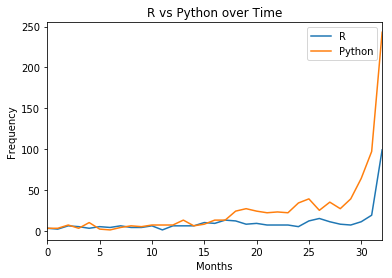

In [78]:
bg = both.plot(title='R vs Python over Time')
bg.set_xlabel("Months")
bg.set_ylabel("Frequency")
print(bg)

In [79]:
pyc=(py['languageName'].value_counts()).reset_index()
ryc=(r['languageName'].value_counts()).reset_index()
bof = ryc.append(pyc)
bof.columns = ['language', 'count']
bof.head()

,language,count
0,R,336
0,Python,863


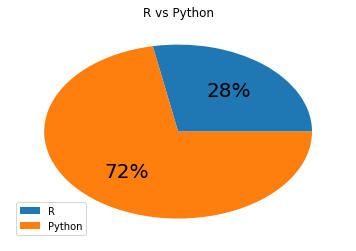

In [80]:
ui = bof['count'].plot(kind='pie',labels=None, autopct='%1.0f%%', fontsize=20, title='R vs Python')
ui.legend(loc=3, labels=bof.language)
ui.set_ylabel(" ")

In [81]:
both['Count'] = both['R'] + both['Python']
both.head()

,year_month,R,Python,Count
0,2015-04-01,3,3,6
1,2015-05-01,2,3,5
2,2015-06-01,6,7,13
3,2015-07-01,5,3,8
4,2015-08-01,3,10,13


In [82]:
both['r'] = both['R'] / both['Count']
both.head()

,year_month,R,Python,Count,r
0,2015-04-01,3,3,6,0.500000
1,2015-05-01,2,3,5,0.400000
2,2015-06-01,6,7,13,0.461538
3,2015-07-01,5,3,8,0.625000
4,2015-08-01,3,10,13,0.230769


In [83]:
both['python'] = both['Python'] / both['Count']
both.head()

,year_month,R,Python,Count,r,python
0,2015-04-01,3,3,6,0.500000,0.500000
1,2015-05-01,2,3,5,0.400000,0.600000
2,2015-06-01,6,7,13,0.461538,0.538462
3,2015-07-01,5,3,8,0.625000,0.375000
4,2015-08-01,3,10,13,0.230769,0.769231


In [84]:
both1 = both[['year_month', 'r', 'python']]
both1.head()

,year_month,r,python
0,2015-04-01,0.500000,0.500000
1,2015-05-01,0.400000,0.600000
2,2015-06-01,0.461538,0.538462
3,2015-07-01,0.625000,0.375000
4,2015-08-01,0.230769,0.769231


Axes(0.125,0.125;0.775x0.755)


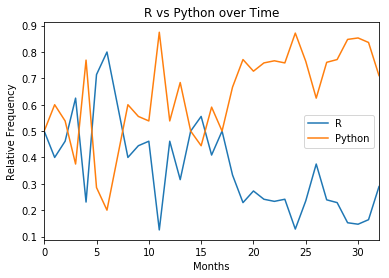

In [86]:
ax = both1.plot(title='R vs Python over Time')
ax.set_xlabel("Months")
ax.set_ylabel("Relative Frequency")
ax.legend(["R", "Python"]);
print(ax)